In [1]:
import sys
sys.path.insert(0,'..')

from src.models import *
from src.loss_functions import *
from src.noise import *
from src.metrics import *
from src.plotting import *
from src.generate_data import *

In [6]:
path = "/h/snagaraj/noise_multiplicity/data/processed/"
filename = generate_filename("MNIST", 1000)

X_train, X_test, y_train, y_test = load_data(filename, path)

    
noise_transition_matrix = np.array([[0.6, 0.4], [0.4, 0.6]])
y_train_noisy = add_label_noise(y_train, noise_transition_matrix)


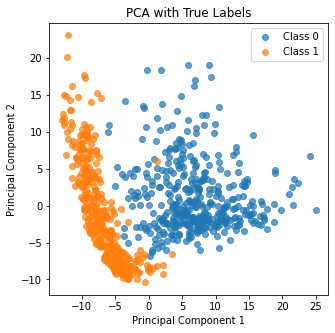

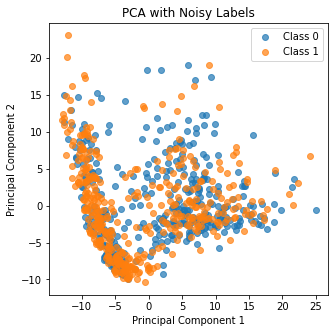

In [7]:
plt.figure(figsize=(5, 5))
#plt.subplot(1, 2, 1)
visualize_pca(X_train, y_train, 'PCA with True Labels')
plt.figure(figsize=(5, 5))

visualize_pca(X_train, y_train_noisy, 'PCA with Noisy Labels')


In [ ]:
num_models=100
num_epochs = 150

correction_types = [("NONE", "Noisy Labels - Uncorrected"), 
                    ("forward", "Noisy Labels - Forward"), 
                    ("backward", "Noisy Labels - Backward"), 
                    ("CLEAN", "Clean Labels")]

probabilities_dict = {}
accuracies_dict = {}

for correction_type, label in correction_types:
    
    predicted_probabilities, accuracies = train_LR_noise_variance(X_train, 
                                                                  y_train, 
                                                                  X_test, 
                                                                  y_test, 
                                                                  num_models=num_models, 
                                                                  num_epochs=num_epochs, 
                                                                  correction_type=correction_type,
                                                                  noise_transition_matrix = noise_transition_matrix)
    probabilities_dict[label] = predicted_probabilities
    accuracies_dict[label] = accuracies
    
    
disagreement_dict = {}

for label, probabilities in probabilities_dict.items():
    disagreement_rate = estimate_disagreement(probabilities)
    disagreement_dict[label] = disagreement_rate



  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
plot_boxplot(accuracies_dict)
plot_robustness_rates(probabilities_dict)
plot_boxplot(disagreement_dict, y_range=(0.0, 1), title="Disagreement")
plot_disagreement_percentage(probabilities_dict)

# Misspecifying Noise

In [12]:
noise_transition_matrix_est = np.array([[0.9, 0.1], [0.1, 0.9]])

In [13]:
num_models=100
num_epochs = 100

correction_types = [("NONE", "Noisy Labels - Uncorrected"), 
                    ("forward", "Noisy Labels - Forward"), 
                    ("backward", "Noisy Labels - Backward"), 
                    ("CLEAN", "Clean Labels")]

probabilities_dict = {}
accuracies_dict = {}

for correction_type, label in correction_types:
    
    predicted_probabilities, accuracies = train_LR_noise_variance(X_train, 
                                                                  y_train, 
                                                                  X_test, 
                                                                  y_test, 
                                                                  num_models=num_models, 
                                                                  num_epochs=num_epochs, 
                                                                  correction_type=correction_type,
                                                                  noise_transition_matrix = noise_transition_matrix_est)
    probabilities_dict[label] = predicted_probabilities
    accuracies_dict[label] = accuracies
    
disagreement_dict = {}

for label, probabilities in probabilities_dict.items():
    disagreement_rate = estimate_disagreement(probabilities)
    disagreement_dict[label] = disagreement_rate



  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

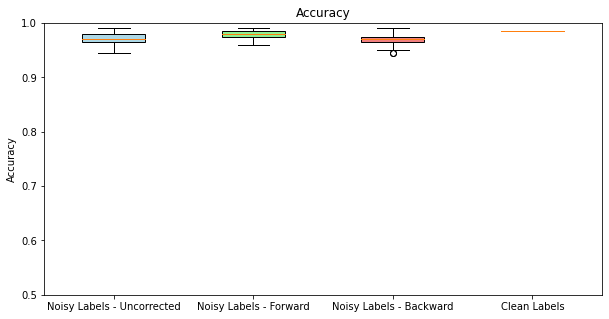

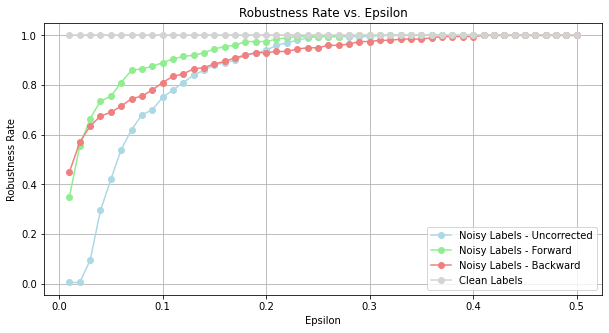

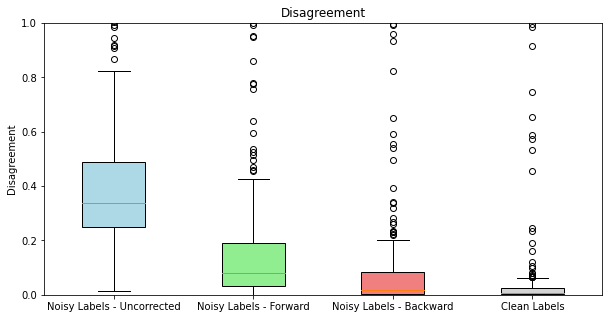

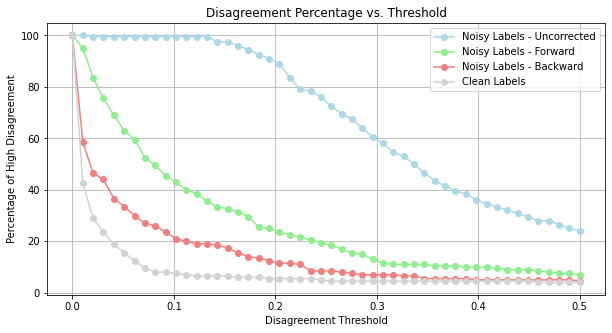

In [14]:
plot_boxplot(accuracies_dict)
plot_robustness_rates(probabilities_dict)
plot_boxplot(disagreement_dict, y_range=(0.0, 1), title="Disagreement")
plot_disagreement_percentage(probabilities_dict)

In [36]:
disagreement_dict

{'Noisy Labels - Uncorrected': array([0.3689633 , 0.20296447, 0.2058111 , 0.24479227, 0.27556792,
        0.5548565 , 0.21522191, 0.2924468 , 0.557912  , 0.42331776,
        0.26378292, 0.5096209 , 0.3582945 , 0.25064716, 0.16328867,
        0.17807624, 0.2112262 , 0.9166089 , 0.16323619, 0.289996  ,
        0.28211844, 0.341866  , 0.3436913 , 0.257181  , 0.19271381,
        0.27774337, 0.3956516 , 0.6267483 , 0.22219913, 0.1610122 ,
        0.18332538, 0.35406345, 0.45564634, 0.21570559, 0.36510924,
        0.40477306, 0.48433816, 0.23589739, 0.28219688, 0.25227028,
        0.20653474, 0.1833486 , 0.20894063, 0.16828626, 0.9177555 ,
        0.48735285, 0.32016233, 0.5083011 , 0.28245053, 0.60321826,
        0.30047652, 0.30930844, 0.5462745 , 0.30805215, 0.45105425,
        0.2953651 , 0.32625577, 0.26230314, 0.5254764 , 0.37407053,
        0.5798028 , 0.44974157, 1.0048513 , 0.25615314, 0.27549025,
        0.2951848 , 0.7630892 , 0.29412788, 0.49626046, 0.13960554,
        0.3125943 

In [37]:
disagreement_percentage(disagreement_dict['Noisy Labels - Uncorrected'])

24.0

In [44]:
for (label, probabilities) in (probabilities_dict.items()):
    disagreement_percentages = disagreement_percentage(estimate_disagreement(probabilities) > 0)
    print(disagreement_percentages)

100.0
100.0
100.0
100.0


In [42]:
disagreement_percentage

<function src.metrics.disagreement_percentage(disagreement_rates)>